Python for Data & Analytics - 2nd Edition<br>
Appendix J - Matplotlib in Brief

*** requires datafile: cars_sales.csv

### J.2 - Bar Chart, Title, and Labels

In [1]:
# Read dataset to DataFrame
import pandas as pd
df = pd.read_csv('cars_sales.csv', index_col='Country')
df

,2020,2019,2018,2017
Country,,,,
China,1246000,1204000,1016002,579000
United States,297939,329528,361307,199818
Germany,394632,108839,67504,54492
Norway,113588,88443,86290,71737
France,194881,69466,53745,42799
United Kingdom,175082,72584,59911,49182
Netherlands,89362,67520,29187,11085
Japan,29000,43867,52013,54100
Sweden,96054,41784,29909,19793


In [2]:
# Import the matplotlib pyplot subpackage
import matplotlib.pyplot as plt

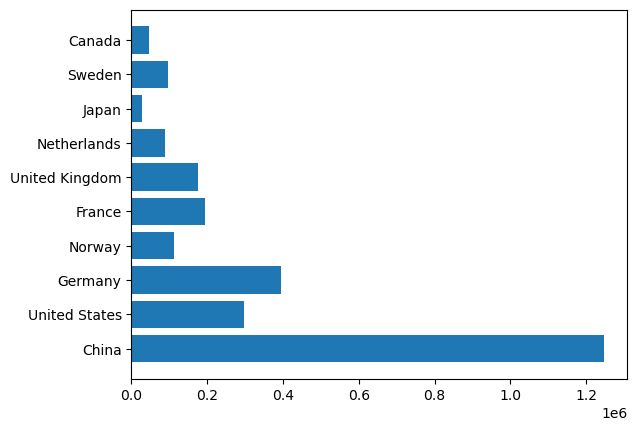

In [3]:
# Plot a horizontal bar for a given year
year = '2020'
plt.barh(df.index, df[year])
plt.show()

In [4]:
# Sort the data, so chart will be ordered (from largest to smallest)
df.sort_values(year, inplace=True)
df

,2020,2019,2018,2017
Country,,,,
Japan,29000,43867,52013,54100
Canada,47000,50960,44150,18746
Netherlands,89362,67520,29187,11085
Sweden,96054,41784,29909,19793
Norway,113588,88443,86290,71737
United Kingdom,175082,72584,59911,49182
France,194881,69466,53745,42799
United States,297939,329528,361307,199818
Germany,394632,108839,67504,54492


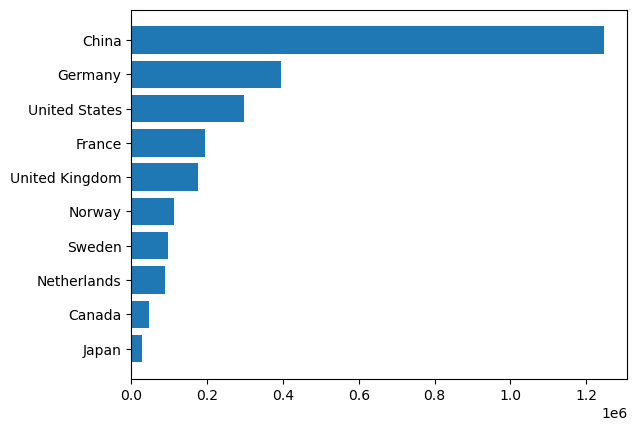

In [5]:
# Replot data based on sorted values
plt.barh(df.index, df[year])
plt.show()

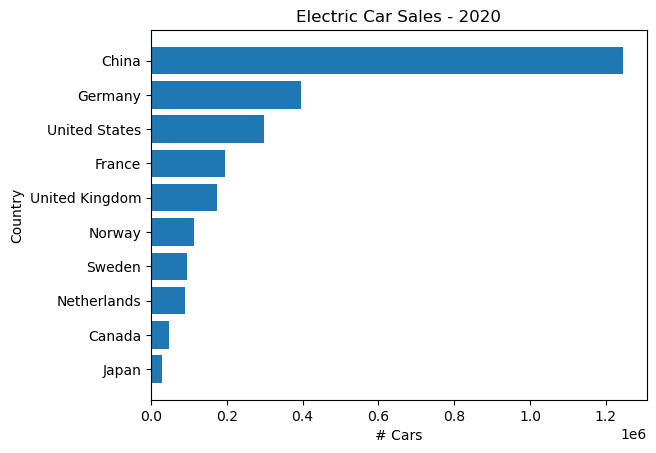

In [6]:
# Add a title and axis labels to the chart
plt.title('Electric Car Sales - ' + year)
plt.xlabel('# Cars')
plt.ylabel('Country')
plt.barh(df.index, df[year])
plt.show()

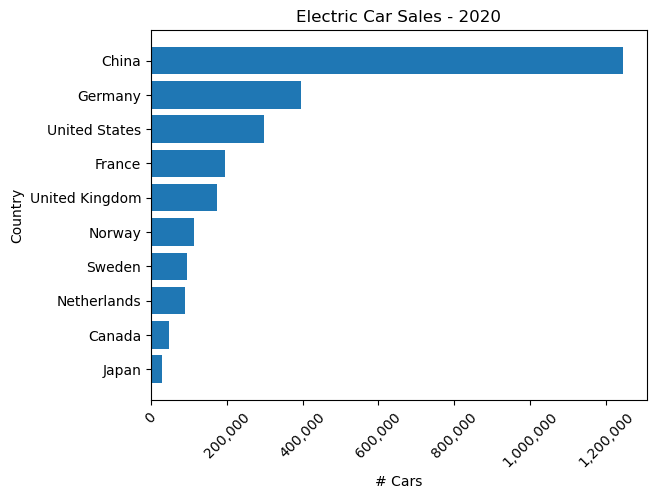

In [7]:
# Format numbers with commas; rotate X labels
import matplotlib.ticker as ticker
plt.title('Electric Car Sales - ' + year)
plt.xlabel('# Cars')
plt.ylabel('Country')
plt.barh(df.index, df[year])
ax = plt.gca() # get current axes
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

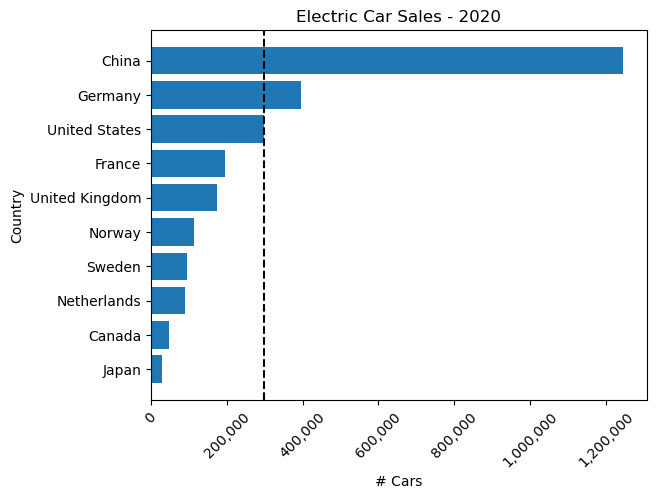

In [8]:
# Add a vertical line
plt.title('Electric Car Sales - ' + year)
plt.xlabel('# Cars')
plt.ylabel('Country')
plt.barh(df.index, df[year])
ax = plt.gca() # get current axes
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.axvline(x=df.loc['United States'][year],
             linestyle='dashed', color='black')
plt.show()

### J.3 - Pie Charts and Chart Size

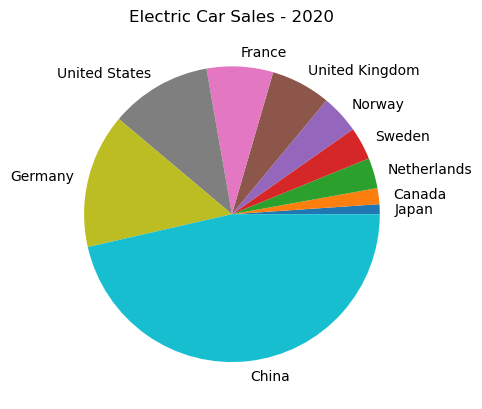

In [9]:
# Alternative chart - pie chart
plt.pie(df[year], labels=df.index)
plt.title('Electric Car Sales - ' + year)
plt.show()

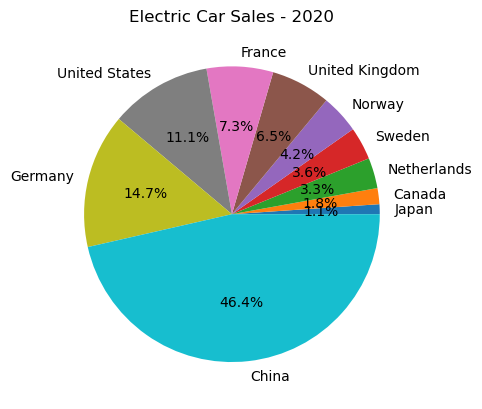

In [10]:
# Add percentages to slices
plt.pie(df[year], labels=df.index, autopct='%1.1f%%')
plt.title('Electric Car Sales - ' + year)
plt.show()

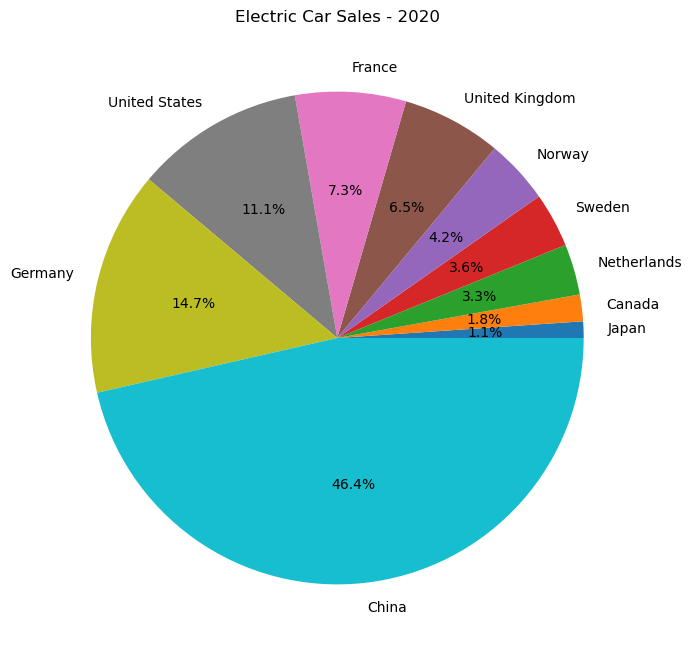

In [11]:
# Expand size of chart
fig, ax = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(8)
ax.pie(df[year], labels=df.index, autopct='%1.1f%%')
plt.title('Electric Car Sales - ' + year)
plt.show()

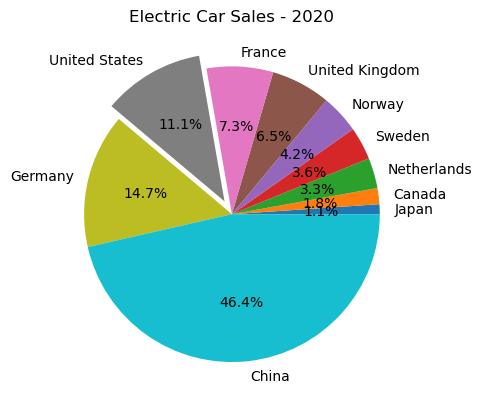

In [12]:
# Explode a slice
fig, ax = plt.subplots()
explode = 10*[0]
explode[7] = .1
ax.pie(df[year], labels=df.index, autopct='%1.1f%%', explode=explode)
plt.title('Electric Car Sales - ' + year)
plt.show()

### J.4 - Line Charts and Legend

In [13]:
# Prepare for line chart - transpose and order years from earliest to latest
dft = df.transpose()
dft.sort_index(inplace=True)
dft

Country,Japan,Canada,Netherlands,Sweden,Norway,United Kingdom,France,United States,Germany,China
2017,54100,18746,11085,19793,71737,49182,42799,199818,54492,579000
2018,52013,44150,29187,29909,86290,59911,53745,361307,67504,1016002
2019,43867,50960,67520,41784,88443,72584,69466,329528,108839,1204000
2020,29000,47000,89362,96054,113588,175082,194881,297939,394632,1246000


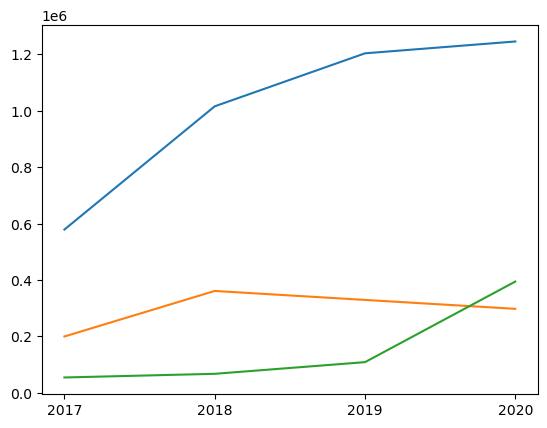

In [14]:
# Line chart for selected countries
years = dft.index
countries = ['China', 'United States', 'Germany']
plt.plot(years, dft[countries])
plt.show()

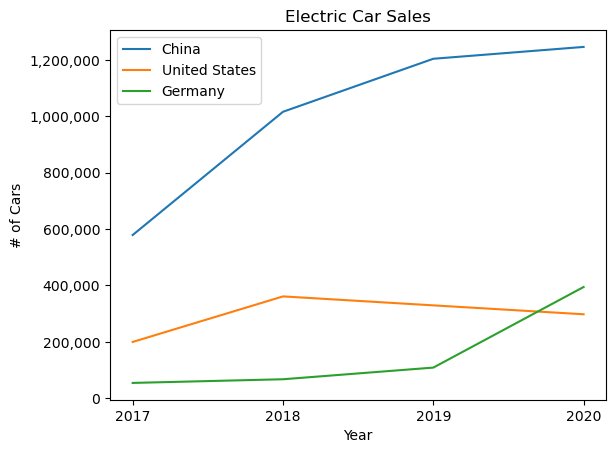

In [15]:
# Refine chart to add title, axes labels, legend
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
years = dft.index
countries = ['China', 'United States', 'Germany']
plt.plot(years, dft[countries])
plt.title('Electric Car Sales')
plt.xlabel('Year')
plt.ylabel('# of Cars')
plt.legend(countries)
plt.show()

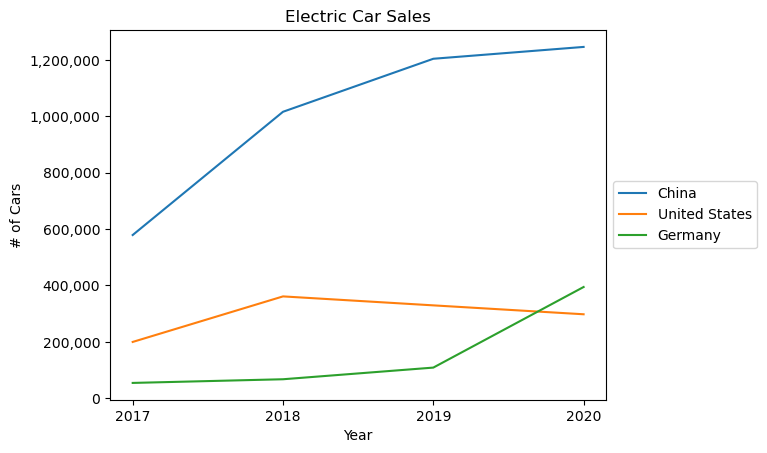

In [16]:
# Move legend outside of chart
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
years = dft.index
countries = ['China', 'United States', 'Germany']
plt.plot(years, dft[countries])
plt.title('Electric Car Sales')
plt.xlabel('Year')
plt.ylabel('# of Cars')
ax.legend(countries, loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### J.5 Stacked Bar Chart

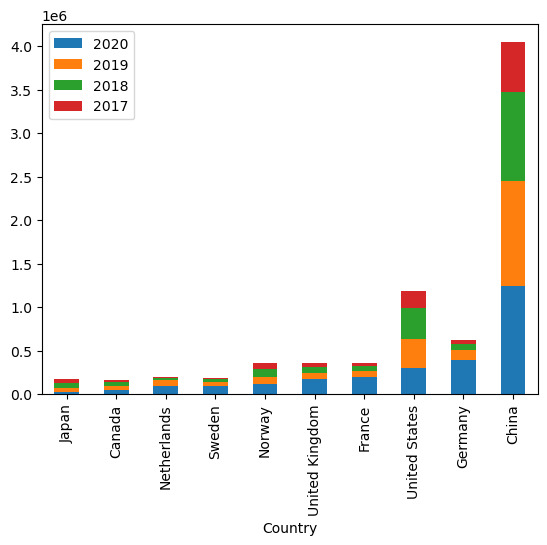

In [17]:
# Initial bar chart with pandas
df.plot(kind='bar', stacked=True)
plt.show()

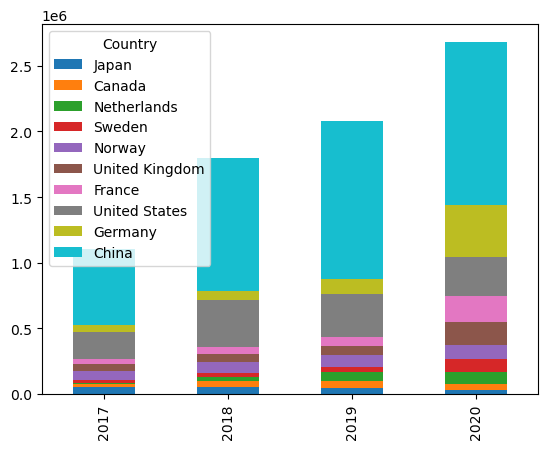

In [18]:
# Revised pandas chart with data transforms (transpose, order by year)
dft = df.transpose()
dft = dft.sort_index()
dft.plot(kind='bar', stacked=True)
plt.show()

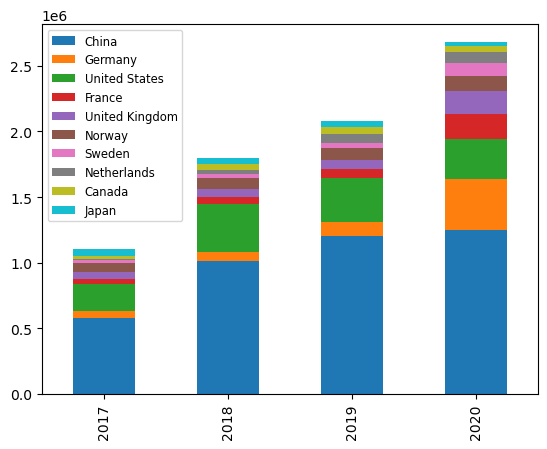

In [19]:
# Revise to order stacking by latest year's sales

# Transform data
df2 = df.sort_values('2020', ascending=False)
df2t = df2.transpose()
df3t = df2t.sort_index()

# Compose the chart
df3t.plot(kind='bar', stacked=True)
plt.legend(loc='upper left', fontsize='small')

plt.show()

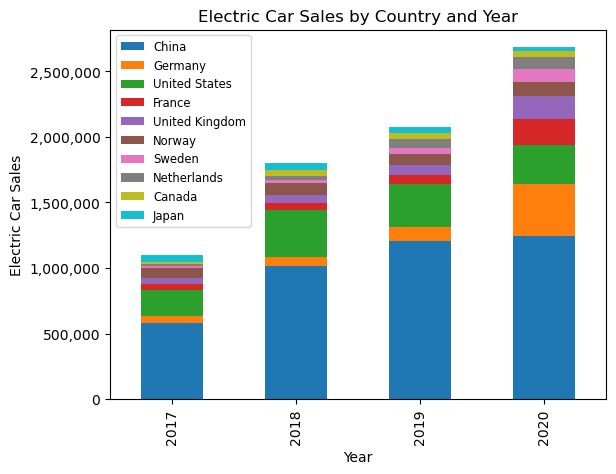

In [20]:
# Revise to add labels, rescale
import matplotlib.ticker as ticker

# Compose the stacked bar chart
df3t.plot(kind='bar', stacked=True)

# Add labels, title, legend
plt.xlabel('Year')
plt.ylabel('Electric Car Sales')
plt.title('Electric Car Sales by Country and Year')
plt.legend(loc='upper left', fontsize='small')

# Scale Y axis
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()

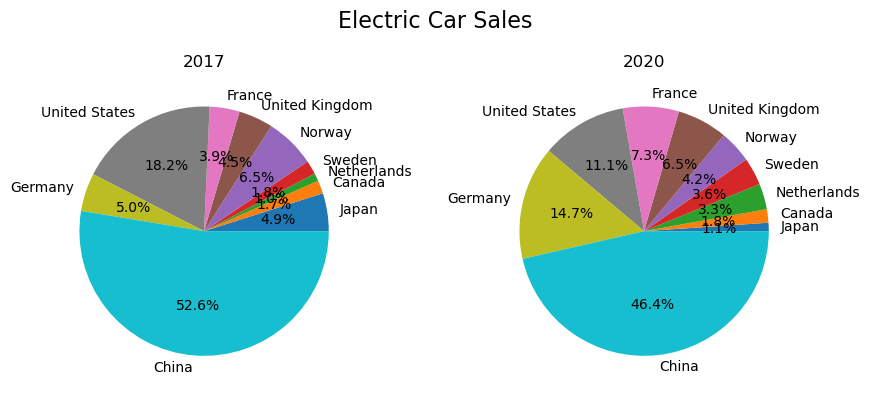

In [21]:
# Side-by-side pie charts
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
fig.suptitle('Electric Car Sales', fontsize=16) # an overall figure title
indices = [-1, 0] # -1 for earliest year, 0 for latest year
for i in range(2):
    axs[i].pie(df.iloc[:, indices[i]], labels=df.index, autopct='%1.1f%%')
    year = df.columns[indices[i]]
    axs[i].set_title(year)
plt.tight_layout()
plt.show()

Code from: Python for Data & Analytics, (c) 2025 Rose River Software, LLC